In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


The data set was drawn from the Boston Standard Metropolitan Statiscal Area in 1970 and the goal is to explore the data as well as produce a regression model to accurately predict the the median house value for each town.
Data sourced from https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [14]:
#reading in data
#need to use delim_whitespace = True as csv delimtied with spaces
house_data = pd.read_csv("data/housing.csv",delim_whitespace = True,header=None)

In [15]:
house_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
#adding in column names from kaggle info
house_data.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B 1000(Bk - 0.63)^2","LSAT","MEDV"]

In [19]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Description of each column in dataset
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per \\$10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

In [20]:
house_data.shape

(506, 14)

In [23]:
#checking for missing values
house_data.isna().sum()

CRIM                   0
ZN                     0
INDUS                  0
CHAS                   0
NOX                    0
RM                     0
AGE                    0
DIS                    0
RAD                    0
TAX                    0
PTRATIO                0
B 1000(Bk - 0.63)^2    0
LSAT                   0
MEDV                   0
dtype: int64

Appears to be no missing values within dataset

In [24]:
house_data.dtypes

CRIM                   float64
ZN                     float64
INDUS                  float64
CHAS                     int64
NOX                    float64
RM                     float64
AGE                    float64
DIS                    float64
RAD                      int64
TAX                    float64
PTRATIO                float64
B 1000(Bk - 0.63)^2    float64
LSAT                   float64
MEDV                   float64
dtype: object

Appears that all the data types in the dataframe are either int or float, however the CHAS and RAD columns are actually categorical variables so this needs to be rectified

In [29]:
#tell pandas to treat these as categorical
house_data["CHAS"] = house_data["CHAS"].astype("category")
house_data["RAD"] = house_data["RAD"].astype("category")

In [30]:
house_data.dtypes

CRIM                    float64
ZN                      float64
INDUS                   float64
CHAS                   category
NOX                     float64
RM                      float64
AGE                     float64
DIS                     float64
RAD                    category
TAX                     float64
PTRATIO                 float64
B 1000(Bk - 0.63)^2     float64
LSAT                    float64
MEDV                    float64
dtype: object

In [47]:
house_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


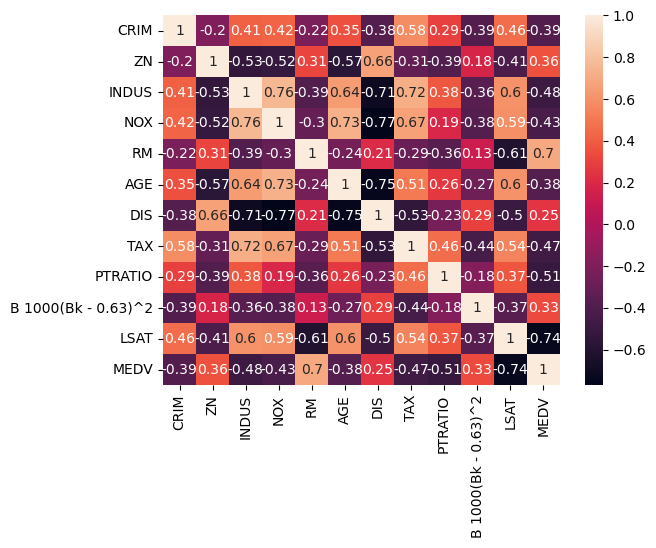

In [71]:
correlation_matrix = house_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.show()

I see that there is a strong estimated correlation between nitrous oxide amounts and industrial areas (unsurpisingly), I plot the variables to investigate further.

In [32]:
sns.set_style()

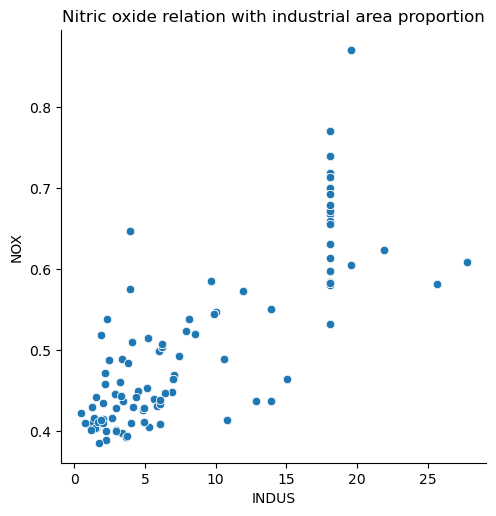

In [57]:
sns.pairplot(house_data,x_vars="INDUS",y_vars="NOX",kind='scatter',height=5)
plt.title("Nitric oxide relation with industrial area proportion")
plt.show()

Interestingly we see a straight vertical line of points which all have the exact same value of INDUS. This is surprising given that the INDUS is meant to be a continous value. I turn on grid lines and increase the x-tick resolution to determine the exact value that I am interested in.

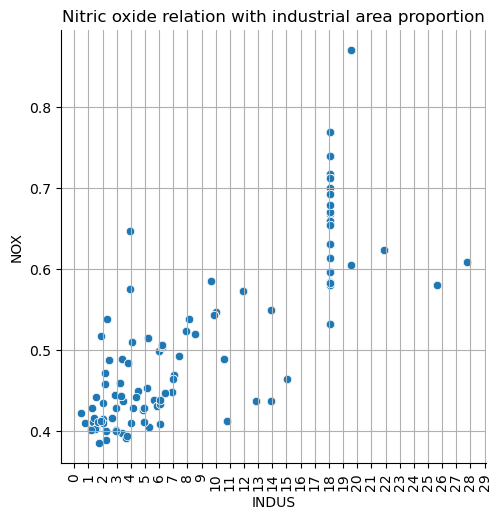

In [58]:
sns.pairplot(house_data,x_vars="INDUS",y_vars="NOX",kind='scatter',height=5)
plt.grid(visible=True)
plt.xticks(np.arange(0,30,1),rotation=90)
plt.title("Nitric oxide relation with industrial area proportion")
plt.show()

In [46]:
house_data[(house_data["INDUS"] > 17) & (house_data["INDUS"] < 19) ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0,0.770,6.112,81.3,2.5091,24,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0,0.770,6.398,88.0,2.5182,24,666.0,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0,0.583,5.871,41.9,3.7240,24,666.0,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0,0.583,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98,19.1


In [53]:
house_data["INDUS"].unique().shape

(76,)

After checking the number of unique values in the INDUS column and find that the number of unique values is actually much less than the total number of observations, I conclude that it is likely that the INDUS measure used is likely to be used on areas grouped together and not calculated on a per area basis.

I am also interested in the approximate distribution of the median house values for each area, I get a rough idea of this through plotting a histogram of the MEDV column.

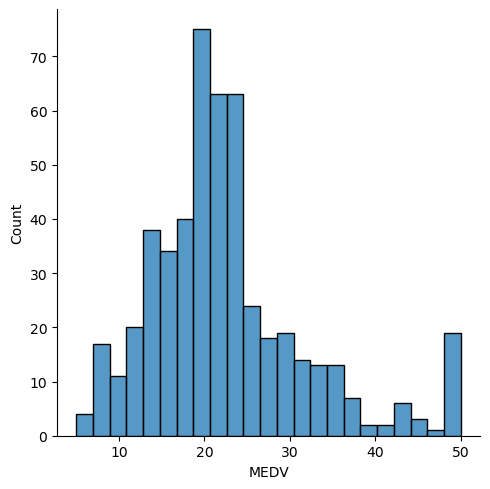

In [67]:
sns.displot(data=house_data,x="MEDV",kind='hist')
plt.show()

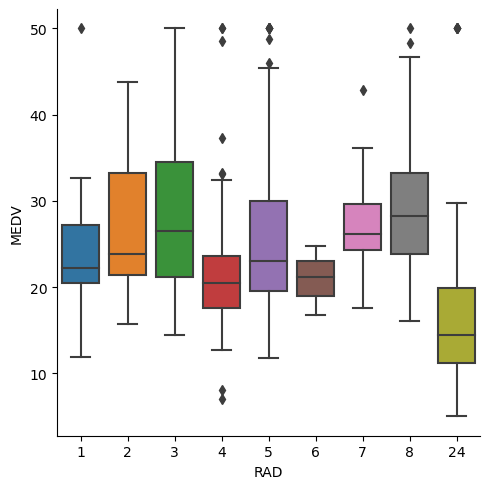

In [78]:
sns.catplot(data=house_data, x="RAD",y="MEDV",kind="box")
plt.show()

The boxplot displays that the median value for MEDV for different accesibility levels to radial highways seems to not make an extremely large difference except for RAD value of 24 which seems to be notiecbly lower. Perhaps the buyers are relatively more indifferent between RAD values of 1-8 but find areas with accessibility values of 24 to be too inaccesible, or there is some correlation with some other variable that areas with radial highway accesibility 24 that is causing this discrepancy.

To investigate this further I subset the data to select only rows with RAD = 24 and compare summary statistics with the full data set.

In [82]:
subset_rad24 = house_data[house_data["RAD"]==24]
subset_rad24.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
count,132.000000,132.0,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.0,1.320000e+02,132.000000,132.000000,132.000000
mean,12.759291,0.0,1.810000e+01,0.672417,6.022152,89.805303,2.061254,666.0,2.020000e+01,288.089167,18.600606,16.403788
std,13.041169,0.0,4.636122e-14,0.061004,0.718449,12.625809,0.617901,0.0,1.426499e-14,145.860431,6.905296,8.539745
min,2.378570,0.0,1.810000e+01,0.532000,3.561000,40.300000,1.129600,666.0,2.020000e+01,0.320000,2.960000,5.000000
25%,5.686307,0.0,1.810000e+01,0.614000,5.713000,85.925000,1.589250,666.0,2.020000e+01,167.375000,14.175000,11.225000
50%,9.084990,0.0,1.810000e+01,0.693000,6.176000,94.400000,1.943400,666.0,2.020000e+01,373.740000,17.910000,14.400000
75%,14.333700,0.0,1.810000e+01,0.713000,6.419000,98.825000,2.431300,666.0,2.020000e+01,395.292500,23.045000,19.900000
max,88.976200,0.0,1.810000e+01,0.770000,8.780000,100.000000,4.098300,666.0,2.020000e+01,396.900000,37.970000,50.000000


In [84]:
house_data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B 1000(Bk - 0.63)^2,LSAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Based purely on summary statistics, the variables that appear to have a significant difference in mean between the 2 groups is CRIM (crime rate) and INDUS (proportion of industrial area). Our regression heatmap suggests both these variables might cause median house value to be lower. 

To get a crude idea of how crime rate/industrial area proportion ,radial highway access interact and median value interact with each other I generate some plots.

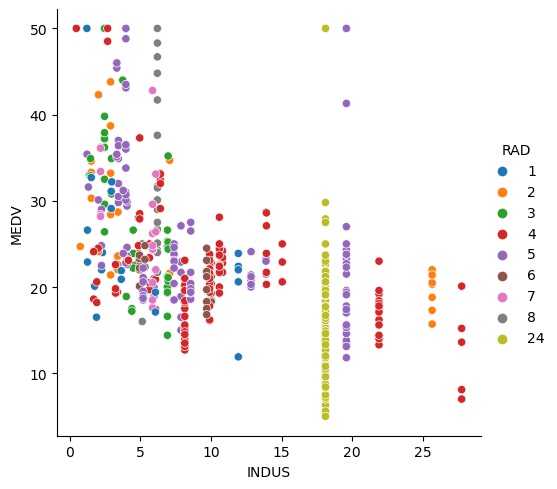

In [92]:
sns.relplot(data=house_data,x="INDUS",y="MEDV",hue="RAD")
plt.show()

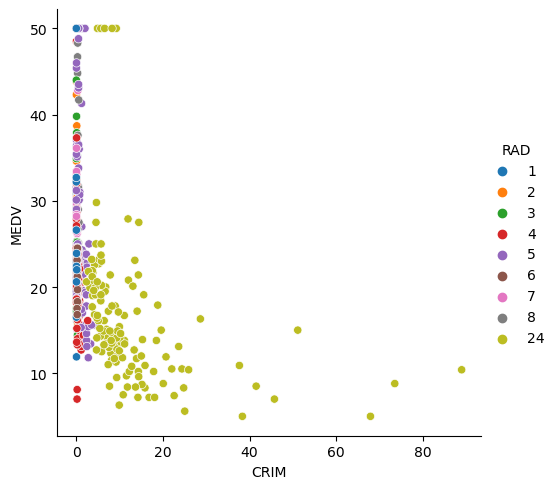

In [94]:
sns.relplot(data=house_data,x="CRIM",y="MEDV",hue="RAD")
plt.show()

The plots above imply that it is likely that the high criminal rates and large amounts of industrial areas that are resulting in lower median house prices as opposed to bad radial highway access causing lowered median house prices as we can see that there are areas with similar or worse industrial area proportions but with better radial highway access having similarly lower median house prices.